# **Assignment 1: Random Number Generation**

Random numbers are fundamental to various AI processes, from initializing weights in neural networks to providing starting points for diffusion models. They play a crucial role in ensuring variability and unpredictability in algorithms.

In this assignment, we will explore how random numbers are generated and how they can be visualized. The goals of the assignment are as follows:

- Generate random numbers by sampling from univariate and multi-variate Gaussian distribution.
- Visualize the generated numbers to understand their distribution and patterns.

**Guidelines**


1.   Try your best to avoid using ChatGPT. The assignment is simple and can be done fairly quickly with ChatGPT. Try reading and researching. The effort helps in building intuition
2.   As always, please resepct the honor code
3.   Submit your assignment in google colab file in the format `assignment-01-registration-number.ipynb`

1.   List item
2.   List item


3.   Bonus Marks: You can push your code to github and clone it here



**Helpful Material**


*   [Random Number Generator: How Do Computers Generate Random Numbers?](https://www.freecodecamp.org/news/random-number-generator/)
*   [Linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)
*   [Random number generation](https://en.wikipedia.org/wiki/Random_number_generation)
*   [Box muller transform](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)




## 1. Generating Random Numbers

In this assignment, you will create functions to generate random numbers for 1D and 2D arrays. Develop two functions: one for 1D arrays and another for 2D arrays, each with specified mean and variance.

**Instructions:**

1. **Random Number Generation:**
   - Use numpy to generate random integers.
   - Implement a Gaussian number generator using the Box-Muller transform. The function should take mean, standard deviation, and count as inputs.
   - Implement a multivariate Gaussian generator. The function should take a mean vector, covariance matrix, and count as inputs.

2. **Implementation Details:**
   - Feel free to create additional helper functions or classes if needed.
   - Include error handling for invalid inputs, such as negative mean or variance.
   - You can use numpy and other libraries for efficient computation but not their built-in random number generators

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from typing import List

class RNG:

    _seed = 123456789  # Initial seed for the generator

    @staticmethod
    def _lcg(a: int = 1664525, c: int = 1013904223, m: int = 2**32) -> float:
        """Linear Congruential Generator (LCG) for uniform [0,1) distribution."""
        RNG._seed = (a * RNG._seed + c) % m
        return RNG._seed / m

    @staticmethod
    def uniform(count: int) -> np.ndarray:
        """Generate random numbers from a uniform distribution using LCG."""
        return np.array([RNG._lcg() for _ in range(count)])

    @staticmethod
    def gaussian(count: int,
                 mean: float = 0,
                 std_dev: float = 1) -> np.ndarray:
        """Generate random numbers using the Box-Muller transform for Gaussian distribution."""

        if count <= 0:
            raise ValueError("Count must be a positive integer.")

        if std_dev < 0:
            raise ValueError("Standard deviation must be non-negative.")

        # Half the count since each Box-Muller transform generates two numbers
        half_count = (count + 1) // 2

        u1 = RNG.uniform(half_count)
        u2 = RNG.uniform(half_count)

        # Computing both z0 and z1
        z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2.0 * np.log(u1)) * np.sin(2 * np.pi * u2)

        # Combine both z0 and z1 and then adjust by mean and standard deviation
        z = np.concatenate([z0, z1])[:count]  # Trim to the exact requested count
        return mean + z * std_dev

    @staticmethod
    def mv_gaussian(mean_vec: List[float],
                    cov_matrix: List[List[float]],
                    count: int) -> np.ndarray:
        """Generate random numbers from a multivariate Gaussian distribution."""

        mean_vec = np.array(mean_vec)
        cov_matrix = np.array(cov_matrix)

        if count <= 0:
            raise ValueError("Count must be a positive integer.")

        if len(mean_vec) != len(cov_matrix):
            raise ValueError("Mean vector and covariance matrix dimensions must match.")

        # Cholesky decomposition to convert covariance matrix
        L = np.linalg.cholesky(cov_matrix)

        # Generating standard normal random variables
        z = np.array([RNG.gaussian(len(mean_vec)) for _ in range(count)])

        # Applying transformation to get correlated Gaussian variables
        return mean_vec + np.dot(z, L.T)



### 2. Generating and Visualizing Random Numbers

In this part of the assignment, you will use the functions you've created to generate random numbers and then visualize the results. This will help you understand the distribution and characteristics of the generated numbers more effectively.

**Guidelines:**

1. **Visualize the Results:**
   - Use the above functions to visualize the following
      - Uniform Distribution
      - 1d Guassian Distribution
      - 2d Gaussian Distribution

3. **Implementation Details:**
   - Use libraries such as `matplotlib` and `seaborn` for visualization. Make sure to include appropriate labels and titles to make your plots informative.

In [32]:
import seaborn as sns

# Visualizing the Generated Random Numbers

# 1. Uniform Distribution Visualization
def plot_uniform_distribution():
    uniform_samples = RNG.uniform(1000)
    plt.figure(figsize=(8, 5))
    sns.histplot(uniform_samples, bins=30, color='blue')
    plt.title("Uniform Distribution")
    plt.xlabel("Random Numbers (0 to 1)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# 2. 1D Gaussian Distribution Visualization
def plot_1d_gaussian_distribution(mean=0, std_dev=1):
    gaussian_samples = RNG.gaussian(1000, mean, std_dev)
    plt.figure(figsize=(8, 5))
    sns.histplot(gaussian_samples, bins=30, kde=True, color='green')
    plt.title(f"1D Gaussian Distribution (mean={mean}, std_dev={std_dev})")
    plt.xlabel("Random Numbers")
    plt.ylabel("Density")
    plt.grid(True)

    # Adding the annotations for mean
    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.legend()

    plt.show()

# 3. 2D Gaussian Distribution Visualization
def plot_2d_gaussian_distribution(mean_vec=[0, 0], cov_matrix=[[1, 0.5], [0.5, 1]]):
    mv_gaussian_samples = RNG.mv_gaussian(mean_vec, cov_matrix, 1000)
    plt.figure(figsize=(8, 5))
    plt.scatter(mv_gaussian_samples[:, 0], mv_gaussian_samples[:, 1], color='red', alpha=0.6)
    plt.title("2D Gaussian Distribution")
    plt.xlabel("X-axis (1st dimension)")
    plt.ylabel("Y-axis (2nd dimension)")
    plt.grid(True)

    # Annotations for mean vector
    plt.axhline(y=mean_vec[1], color='blue', linestyle='--', label='Mean Y')
    plt.axvline(x=mean_vec[0], color='green', linestyle='--', label='Mean X')
    plt.legend()

    plt.show()


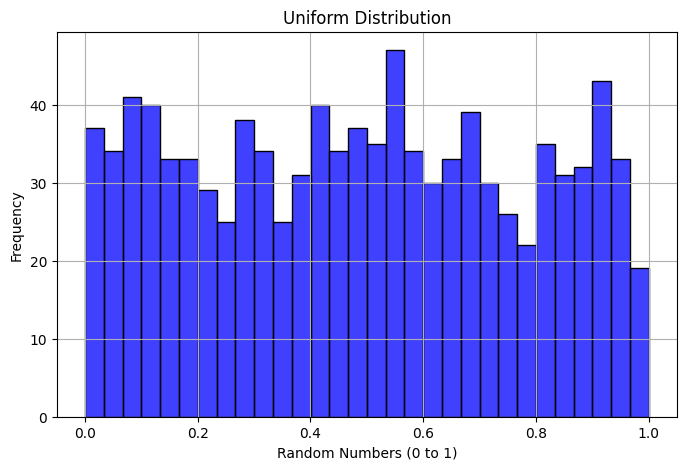

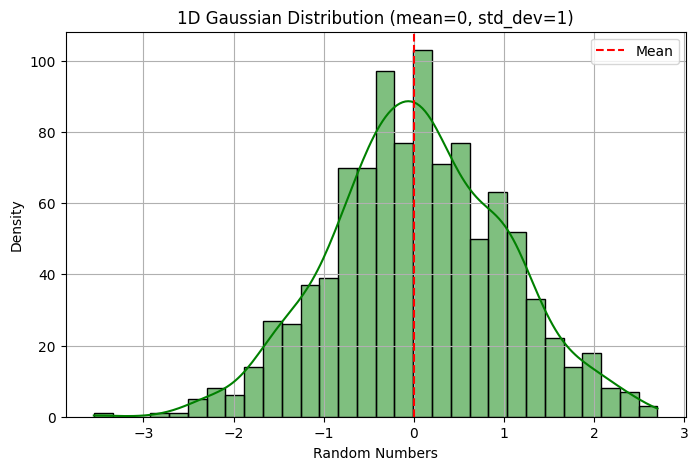

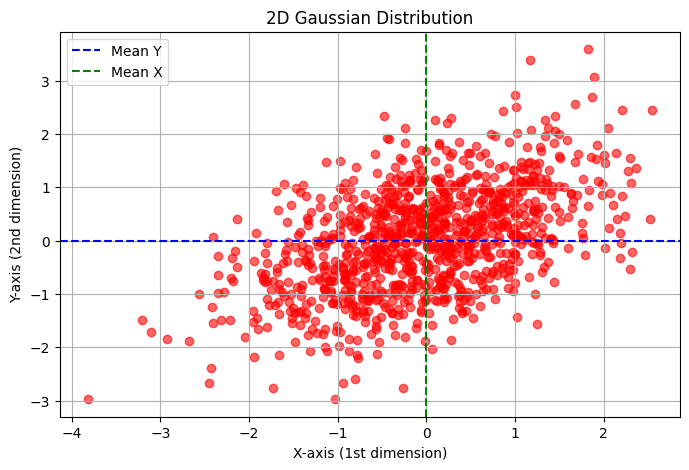

In [33]:
# Visualizing the distributions
plot_uniform_distribution()         # Uniform Distribution
plot_1d_gaussian_distribution()     # 1D Gaussian Distribution
plot_2d_gaussian_distribution()     # 2D Gaussian Distribution